In [16]:
from matplotlib.collections import LineCollection
import geopandas
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import pandas as pd
from string import punctuation
import re
import shapefile
from shapely.geometry import Polygon
from shapely.ops import cascaded_union, unary_union

from pyensae import download_data

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /home/ladmin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Données cartographiques

In [12]:
download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z",
          website="https://wxs-telechargement.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/" + \
          "GEOFLA_THEME-DEPARTEMENTS_2015_2$GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/file/")
from pyquickhelper.filehelper import un7zip_files
download_data("DEPARTEMENT.zip")

departements = "DEPARTEMENT.shp"

import geopandas as gpd
map_df = gpd.read_file(departements )
map_df

,ID_GEOFLA,CODE_DEPT,NOM_DEPT,CODE_CHF,NOM_CHF,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,Y_CENTROID,CODE_REG,NOM_REG,geometry
0,DEPARTEM0000000000000004,89,YONNE,024,AUXERRE,742447,6744261,748211,6750855,27,BOURGOGNE-FRANCHE-COMTE,"POLYGON ((701742 6751181.100000001, 701651.9 6..."
1,DEPARTEM0000000000000028,69,RHONE,381,LYON,842221,6520526,832095,6530600,84,AUVERGNE-RHONE-ALPES,"POLYGON ((805106.9 6560756, 805127 6560775.800..."
2,DEPARTEM0000000000000063,51,MARNE,108,CHALONS-EN-CHAMPAGNE,799920,6873828,795875,6873865,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,"POLYGON ((751361 6900333.4, 751066.7000000001 ..."
3,DEPARTEM0000000000000006,28,EURE-ET-LOIR,085,CHARTRES,588211,6817344,579506,6810114,24,CENTRE-VAL DE LOIRE,"POLYGON ((548948.9 6823333.300000001, 548949 6..."
4,DEPARTEM0000000000000010,67,BAS-RHIN,482,STRASBOURG,1050377,6840891,1035762,6839265,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,"POLYGON ((995986.4 6885362.9, 996001.600000000..."
5,DEPARTEM0000000000000013,14,CALVADOS,118,CAEN,454306,6903286,448366,6868155,28,NORMANDIE,"(POLYGON ((413572.5 6909137.2, 413632.2 690914..."
6,DEPARTEM0000000000000061,23,CREUSE,096,GUERET,612688,6564029,626470,6551558,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,"POLYGON ((604017.7000000001 6590274.300000001,..."
7,DEPARTEM0000000000000045,27,EURE,229,EVREUX,564892,6881977,553891,6888805,28,NORMANDIE,"POLYGON ((509501.5 6910309, 509506.7 6910334, ..."
8,DEPARTEM0000000000000014,93,SEINE-SAINT-DENIS,008,BOBIGNY,658860,6867904,659903,6867852,11,ILE-DE-FRANCE,"POLYGON ((648166.9 6872613.100000001, 648128.4..."
9,DEPARTEM0000000000000019,02,AISNE,408,LAON,745143,6940641,743736,6938772,32,NORD-PAS-DE-CALAIS-PICARDIE,"POLYGON ((708689.6000000001 6956305.800000001,..."


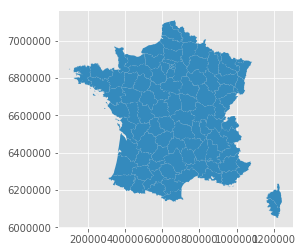

In [13]:
map_df.plot()

## Données grand débat

In [1]:
import pandas as pd
link='http://opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net/'
dates=['2019-02-06']
debats=['DEMOCRATIE_ET_CITOYENNETE', 'LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES']
df=pd.read_csv(link+dates[0]+'/'+debats[1]+'.csv')
#participation par département : 
df['CODE_DEPT']=df.authorZipCode[0:2]
df['CODE_DEPT']=df.authorZipCode.astype(str).str.slice(0,2)

/home/ladmin/Applications/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,Quelles sont toutes les choses qui pourraient être faites pour améliorer l'information des citoyens sur l'utilisation des impôts ?,Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?,Quels sont selon vous les impôts qu'il faut baisser en priorité ?,"Afin de financer les dépenses sociales, faut-il selon vous...","S'il faut selon vous revoir les conditions d'attribution de certaines aides sociales, lesquelles doivent être concernées ?",Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?,"Pour quelle(s) politique(s) publique(s) ou pour quels domaines d'action publique, seriez-vous prêts à payer plus d'impôts ?",Y a-t-il d'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?,CODE_DEPT
0,3-2,TVA sociale,2019-01-22 09:35:18,2019-01-22 09:35:18,NaN,False,NaN,VXNlcjo3ZTVjYTUwMi0xZDZlLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,94800,NaN,NaN,NaN,diminuer la CSG de 2 points et en contrepartie...,NaN,NaN,NaN,NaN,94
1,3-3,Augmentation du pouvoir d'achat,2019-01-22 09:36:50,2019-01-22 09:38:01,NaN,False,NaN,VXNlcjo5NmNhYWM4ZS0xZTIwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Améliorer le pouvoir d’achat en augmentant les...,27
2,3-4,le patrimoine en or dans l'IFI,2019-01-22 09:38:03,2019-01-22 09:38:03,NaN,False,NaN,VXNlcjo3ZTVjYTUwMi0xZDZlLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,94800,NaN,NaN,NaN,Réforme de l'IFI pour y inclure le patrimoine ...,NaN,NaN,NaN,NaN,94
3,3-6,Pouvoir d achat,2019-01-22 09:40:03,2019-01-22 09:40:03,NaN,False,NaN,VXNlcjpjNDY0ZjllMy0xZDk4LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,35000,NaN,Repartir les richesses. suppression de la tax...,Csg .taxe d habitation .,Revoir les conditions d'attribution de certain...,NaN,Santé. Éducation,NaN,NaN,35
4,3-8,droits et devoirs,2019-01-22 09:40:53,2019-01-22 09:40:53,NaN,False,NaN,VXNlcjo3MDdkM2IzOC0xZDYxLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,22680,NaN,"Les droits soient automatiques, comme nos devo...",NaN,NaN,on nous parle toujours de nos devoirs mais rar...,NaN,NaN,NaN,22


In [15]:
df['participation']=1
df2=df[['participation' ,'CODE_DEPT']]
df2['CODE_DEPT']=df2['CODE_DEPT'].astype(int)
brut = df2.groupby(["CODE_DEPT"]).count()

brut['participation']=brut['participation'].astype(int)
brut=brut.reset_index()

brut = brut.sort_values(by=['CODE_DEPT'])
brut=brut[brut['CODE_DEPT']>0]
brut.head()

/home/ladmin/Applications/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CODE_DEPT,participation
2,1,2
3,2,1
4,3,4
5,4,2
6,5,1


Rename columns: coder friendly names

In [3]:
dict_question_nom_courts=dict() 
dict_question_nom_courts['information']='Quelles sont toutes les choses qui pourraient être faites pour améliorer l\'information des citoyens sur l\'utilisation des impôts ?'
dict_question_nom_courts['justice_fiscale']='Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?'
dict_question_nom_courts['priorite_baisse']='Quels sont selon vous les impôts qu\'il faut baisser en priorité ?'
dict_question_nom_courts['financement-depense-sociale']='Afin de financer les dépenses sociales, faut-il selon vous...'
dict_question_nom_courts['attribution_aide_sociale']='S\'il faut selon vous revoir les conditions d\'attribution de certaines aides sociales, lesquelles doivent être concernées ?'
dict_question_nom_courts['domaines_prioritaires']='Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?'
dict_question_nom_courts['augmentation_impot']='Pour quelle(s) politique(s) publique(s) ou pour quels domaines d\'action publique, seriez-vous prêts à payer plus d\'impôts ?'
dict_question_nom_courts['divers']='Y a-t-il d\'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?'

for key in dict_question_nom_courts:
  df = df.rename(columns={dict_question_nom_courts[key]: key})
df.columns

Index(['reference', 'title', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode',
       'information', 'justice_fiscale', 'priorite_baisse',
       'financement-depense-sociale', 'attribution_aide_sociale',
       'domaines_prioritaires', 'augmentation_impot', 'divers', 'CODE_DEPT'],
      dtype='object')

In [10]:
list(df['justice_fiscale'].loc[df['justice_fiscale']!=''][1:10])

['Les droits soient automatiques, comme nos devoirs de payer les impots',
 'réduire drastiquement la fraude fiscale. Imposer les grands groupes (GAFA) qui ne le sont pas suffisamment \nRenforcer la taxe sur les transactions\xa0 financières',
 'diminuer le taux de prelevement pour les retraités percevant mins de 2550 euros',
 'TOUT FRANÇAIS DEVRA PAYER L’IMPÔT QU’IL SOIT DOMICILIÉ OU NON EN FRANCE LES FRANÇAIS NE VOULANT PLUS PAYER L’IMPOT EN FRANCE DEVRONT CHANGER DE NATIONALITÉ .\n\nL’IMPOT DEVRA ETRE PROGRESSIF EGALEMENT POUR LES ARTISTES ET LES CHEFS D’ENTREPRISE LES SPORTIFS ETC , LA FISCALITÉ DEVRA ETRE FIXÉE DANS LES SIX MOIS APRES LA PRISE DE FONCTION DU NOUVEAU GOUVERNEMENT (CONSTITUTION)\n\nTOUTES SOCIÉTÉ  ÉTRANGÈRES REALISANT DES AFFAIRES EN FRANCE DEVRONT PAYER UN IMPOT OUBIEN UNE TAXE SUR CHIFFRE D’AFFAIRE ( PLUS DE POSSIBILITE D’AVOIR DES SOCIETE COMME LES GAFA)\n\nUNE NOUVELLE TVA A 30% DEVRA ETRE INSTALLE POUR LES PRODUITS DE LUXE  (VOITURE , BIJOUX , ARTS ETC) \n\nPLAFO

Clean text columns

In [17]:
text = list(df['justice_fiscale'])

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('french')
url_pattern = r'https?:\/\/.*[\r\n]*'
digit_pattern = '\d+'
whitespace_pattern = r'\s+'

clean = [re.sub(url_pattern, '', t) for t in text]
clean = [re.sub(digit_pattern, '', t) for t in clean]
clean = [''.join([ch for ch in review if ch not in punctuation]) for review in clean]
clean = [review.lower() for review in clean]
clean = [review.strip() for review in clean]
clean = [re.sub(whitespace_pattern, ' ', t) for t in clean]
clean2 = [''.join([ch for ch in review if ch not in stop]) for review in clean]
clean = [''.join([ch for ch in review if ch not in autre_stop]) for review in clean]
clean[:10]


[nltk_data] Downloading package stopwords to /home/ladmin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'autre_stop' is not defined

One column for all the text responses:

In [4]:
df['all_responses']=''
for key in dict_question_nom_courts:
  df[key] = df[key].fillna('')
  df['all_responses']=df['all_responses']+' '+df[key]

# Merge

In [16]:
#merged = pd.merge(map_df,brut, on=['CODE_DEPT'])
merged = map_df.set_index('CODE_DEPT').join(brut.set_index('CODE_DEPT'))
merged.head()

,ID_GEOFLA,NOM_DEPT,CODE_CHF,NOM_CHF,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,Y_CENTROID,CODE_REG,NOM_REG,geometry,participation
CODE_DEPT,,,,,,,,,,,,
89,DEPARTEM0000000000000004,YONNE,024,AUXERRE,742447,6744261,748211,6750855,27,BOURGOGNE-FRANCHE-COMTE,"POLYGON ((701742 6751181.100000001, 701651.9 6...",NaN
69,DEPARTEM0000000000000028,RHONE,381,LYON,842221,6520526,832095,6530600,84,AUVERGNE-RHONE-ALPES,"POLYGON ((805106.9 6560756, 805127 6560775.800...",NaN
51,DEPARTEM0000000000000063,MARNE,108,CHALONS-EN-CHAMPAGNE,799920,6873828,795875,6873865,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,"POLYGON ((751361 6900333.4, 751066.7000000001 ...",NaN
28,DEPARTEM0000000000000006,EURE-ET-LOIR,085,CHARTRES,588211,6817344,579506,6810114,24,CENTRE-VAL DE LOIRE,"POLYGON ((548948.9 6823333.300000001, 548949 6...",NaN
67,DEPARTEM0000000000000010,BAS-RHIN,482,STRASBOURG,1050377,6840891,1035762,6839265,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,"POLYGON ((995986.4 6885362.9, 996001.600000000...",NaN


## Questions:
* pour ou contre augmenter les impôts ?
    * quels impôts augmenter ou réduire ?
* pour ou contre augmenter les dépenses ? 
    * quelles dépenses augmenter ou réduire ?
* comment financer les dépenses ?

